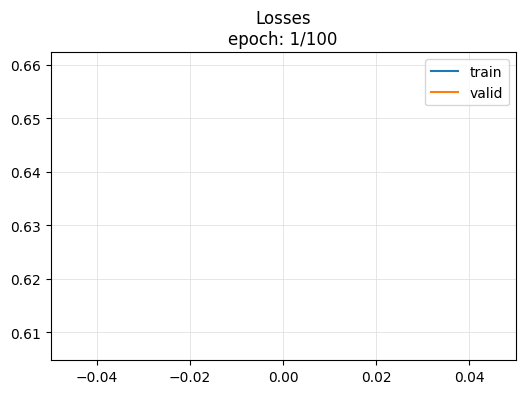

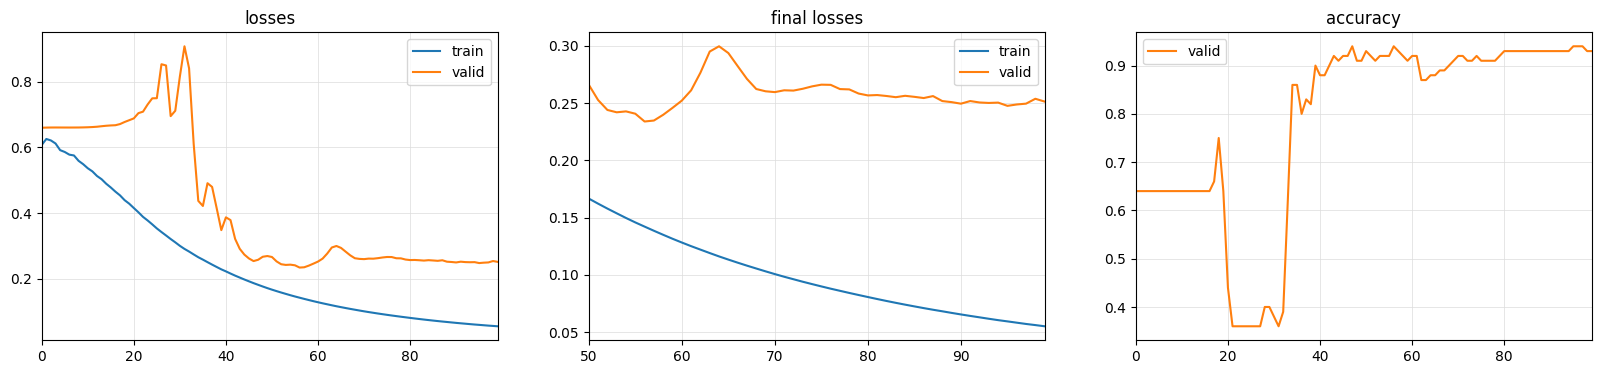

In [1]:
from tsai.basics import *

X, y, splits = get_classification_data('ECG200', split_data=False)
tfms = [None, TSClassification()]
batch_tfms = TSStandardize()
clf = TSClassifier(X, y, splits=splits, path='models', arch="InceptionTimePlus", tfms=tfms, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
clf.fit_one_cycle(100, 3e-4)
clf.export("clf.pkl") 

In [2]:
from tsai.inference import load_learner

clf = load_learner("models/clf.pkl")
probas, target, preds = clf.get_X_preds(X[splits[1]], y[splits[1]])

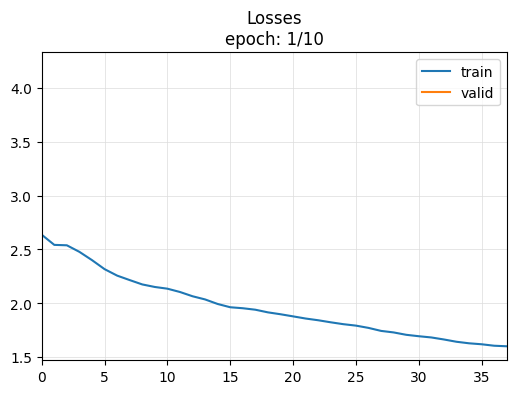

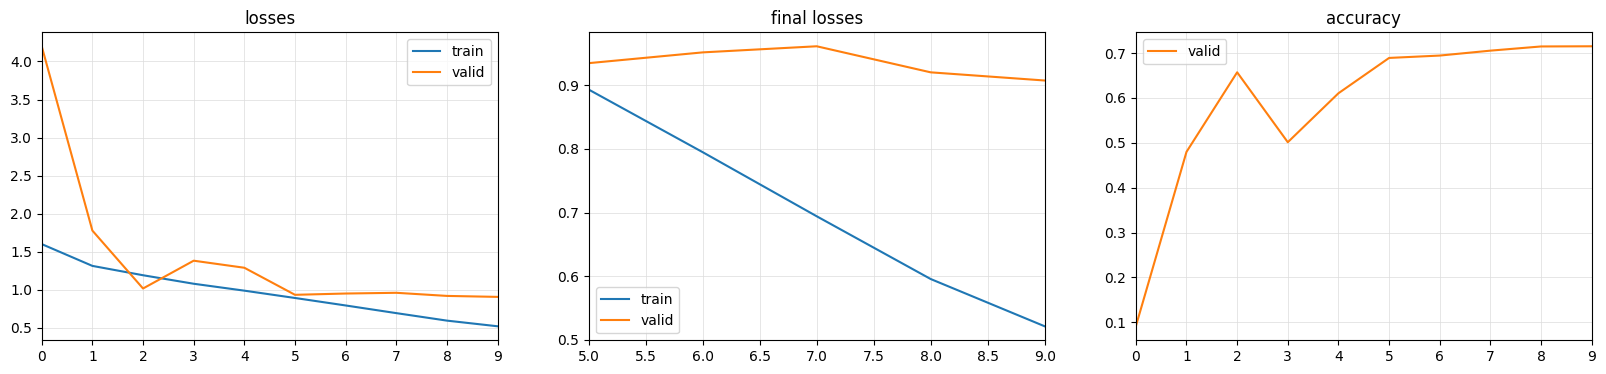

In [3]:
from tsai.basics import *

X, y, splits = get_classification_data('LSST', split_data=False)
tfms = [None, TSClassification()]
batch_tfms = TSStandardize(by_sample=True)
mv_clf = TSClassifier(X, y, splits=splits, path='models', arch="InceptionTimePlus", tfms=tfms, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
mv_clf.fit_one_cycle(10, 1e-2)
mv_clf.export("mv_clf.pkl")

In [4]:
from tsai.inference import load_learner

mv_clf = load_learner("models/mv_clf.pkl")
probas, target, preds = mv_clf.get_X_preds(X[splits[1]], y[splits[1]])

In [5]:
from tsai.all import *
my_setup()

os              : Windows-10-10.0.22621-SP0
python          : 3.9.13
tsai            : 0.3.6
fastai          : 2.7.12
fastcore        : 1.5.29
torch           : 2.0.0+cpu
cpu cores       : 4
threads per cpu : 2
RAM             : 15.8 GB
GPU memory      : N/A


In [6]:
X,y,splits = get_UCR_data('LSST', split_data=False)
tfms=[None, TSClassification()]
batch_tfms = [TSStandardize(by_sample=True)]
dls = get_ts_dls(X,y,splits=splits,tfms=tfms, batch_tfms=batch_tfms)
learn = ts_learner(dls, InceptionTimePlus, metrics=[accuracy, BalancedAccuracy()], cbs=PredictionDynamics())
timer.start()
learn.fit_one_cycle(50, 1e-3)
timer.stop()

,train_loss,valid_loss,accuracy,balanced_accuracy_score
0,2.42421,2.281866,0.38605,0.17293


,train_loss,valid_loss,accuracy,balanced_accuracy_score
0,2.42421,2.281866,0.38605,0.17293


Total time              : 506.435887


506.435887